## Importing necessary libraries 

In [133]:
import numpy as np
import pandas as pd
import string
from gensim.models import Word2Vec
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from ast import literal_eval
from sklearn.tree import plot_tree
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb

## Load data and pre-processing 

In [134]:
train_data = pd.read_csv('MQADT2023 Training Data.csv')
train_data.head()

,7277.692428,9158.768303,10959.98309,12376.64937,14246.44053,16807.20372,19418.31411,22557.20215,27048.52036,34355.81004,...,8821.962839,4466.061251,258.5971214,-2636.367366,-4926.297297,-6355.116351,-7676.296546,-8948.865643,-10047.82368,1
0,7277.692428,9158.768303,10959.98309,12376.64937,14246.44053,16807.20372,19418.31411,22557.20215,27048.52036,34355.81004,...,8821.962839,4466.061251,258.597121,-2636.367366,-4926.297297,-6355.116351,-7676.296546,-8948.865643,-10047.823680,1
1,19858.980410,22011.121650,23506.38444,25174.50998,26622.23551,28842.44146,31540.18076,34455.07889,37911.25350,45136.91646,...,18662.986260,14946.437130,10823.660530,8566.721249,6132.597647,4601.681915,3146.393636,2247.507335,1699.748495,1
2,20693.239380,22274.663880,24091.68835,25389.10191,26833.89994,28356.15549,31396.36339,34245.07908,38566.56357,45092.36016,...,18796.605790,15224.953190,10760.387440,8820.721884,6562.619834,4821.977091,3228.718807,2910.282310,1762.404803,1
3,17224.002290,18918.497740,20812.81110,22013.69696,24072.21713,25913.11382,28777.83001,31704.86564,35505.36274,42941.16094,...,13721.253660,10090.898540,6354.699289,4733.404457,2171.382727,390.827085,-315.459986,-1304.657565,-2123.713161,1
4,23356.141170,25542.187860,26834.16383,28788.66664,30575.83521,32660.70306,35220.33317,38305.31495,42191.94447,49219.98244,...,18244.663950,15126.604470,11872.342700,9510.205910,7509.005178,6052.613589,5147.841260,4225.557208,4199.289624,1


In [135]:
num_columns = train_data.shape[1] 
column_headers = [f"var {i+1}" for i in range(num_columns - 1)] + ["label"]
train_data.columns = column_headers
train_data.head()

,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,var 10,...,var 220,var 221,var 222,var 223,var 224,var 225,var 226,var 227,var 228,label
0,7277.692428,9158.768303,10959.98309,12376.64937,14246.44053,16807.20372,19418.31411,22557.20215,27048.52036,34355.81004,...,8821.962839,4466.061251,258.597121,-2636.367366,-4926.297297,-6355.116351,-7676.296546,-8948.865643,-10047.823680,1
1,19858.980410,22011.121650,23506.38444,25174.50998,26622.23551,28842.44146,31540.18076,34455.07889,37911.25350,45136.91646,...,18662.986260,14946.437130,10823.660530,8566.721249,6132.597647,4601.681915,3146.393636,2247.507335,1699.748495,1
2,20693.239380,22274.663880,24091.68835,25389.10191,26833.89994,28356.15549,31396.36339,34245.07908,38566.56357,45092.36016,...,18796.605790,15224.953190,10760.387440,8820.721884,6562.619834,4821.977091,3228.718807,2910.282310,1762.404803,1
3,17224.002290,18918.497740,20812.81110,22013.69696,24072.21713,25913.11382,28777.83001,31704.86564,35505.36274,42941.16094,...,13721.253660,10090.898540,6354.699289,4733.404457,2171.382727,390.827085,-315.459986,-1304.657565,-2123.713161,1
4,23356.141170,25542.187860,26834.16383,28788.66664,30575.83521,32660.70306,35220.33317,38305.31495,42191.94447,49219.98244,...,18244.663950,15126.604470,11872.342700,9510.205910,7509.005178,6052.613589,5147.841260,4225.557208,4199.289624,1


In [136]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

## Oversampling the data 

In [137]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [138]:
X_train.shape
X_resampled.shape

(132, 228)

## Importing and Training models

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [140]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
svm_classifier = SVC(probability=True)
ada_classifier = AdaBoostClassifier()
dt_classifier.fit(X_resampled, y_resampled)
rf_classifier.fit(X_resampled, y_resampled)
nb_classifier.fit(X_resampled, y_resampled)
svm_classifier.fit(X_resampled, y_resampled)
ada_classifier.fit(X_resampled, y_resampled)

AdaBoostClassifier()

## Training models separately 

In [141]:
# Naive Bayes
nb_classifier.fit(X_resampled, y_resampled)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
#print("Naive Bayes Model Accuracy:", nb_accuracy)

# Decision Tree
dt_classifier.fit(X_resampled, y_resampled)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
#print("Decision Tree Model Accuracy:", dt_accuracy)

# Random Forest
rf_classifier.fit(X_resampled, y_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
#print("Random Forest Model Accuracy:", rf_accuracy)

# SVM
svm_classifier.fit(X_resampled, y_resampled)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
#print("SVM Model Accuracy:", svm_accuracy)

# AdaBoost
ada_classifier.fit(X_resampled, y_resampled)
ada_predictions = ada_classifier.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
#print("AdaBoost Model Accuracy:", ada_accuracy)

## Ensembling them into same model 

In [142]:
ensemble_model = VotingClassifier(
    estimators=[
        ('naive_bayes', nb_classifier),
        ('decision_tree', dt_classifier),
        ('random_forest', rf_classifier),
        ('svm', svm_classifier),
        ('ada', ada_classifier)
    ],
    voting='soft'  # Use soft voting for probabilistic classifiers
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9791666666666666


In [143]:
print(classification_report(y_test, ensemble_predictions))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           3       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [144]:
def cf_matrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    classes = ['1' , '3','5', '7' ,'9','11']
    sns.heatmap(cf, annot = True, xticklabels = classes, yticklabels = classes, fmt ='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

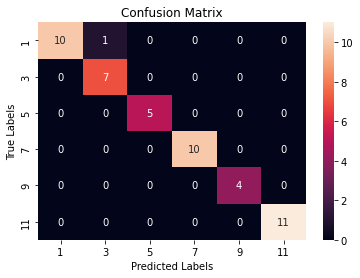

In [145]:
cf_matrix(y_test, ensemble_predictions)

## Interference 

In [152]:
test_data=pd.read_csv('MQADT2023 Testing Data.csv')
test_data.head()

,20240.12421,22123.20627,23519.68149,25529.45408,27047.82096,29245.7098,31667.22663,34990.93364,38839.63856,46187.68964,...,19012.5697,15481.5509,12126.17126,8702.647457,6421.258035,4583.285489,3520.812586,1797.053477,1526.396423,855.5124494
0,20240.12421,22123.20627,23519.68149,25529.45408,27047.82096,29245.70980,31667.22663,34990.93364,38839.63856,46187.68964,...,19012.56970,15481.55090,12126.17126,8702.647457,6421.258035,4583.285489,3520.812586,1797.053477,1526.396423,855.512449
1,19812.33381,22287.01150,23920.20830,25294.40090,26842.77099,28829.97790,31814.74684,34664.92407,38505.87721,45106.52576,...,22878.53638,18777.44803,15374.20068,11723.259360,8851.592697,6637.050225,4916.764678,4257.378436,2244.158007,2276.957666
2,22040.13333,23846.10447,25199.72610,26555.63232,28151.42086,30444.01041,32769.72656,35534.08466,39613.22630,45906.13902,...,23301.22893,20002.27596,16268.10793,12420.852530,9998.041151,7946.476215,6286.719059,5696.151647,4473.894140,3526.930147
3,24122.25530,26576.14542,27846.80175,29426.46646,31285.71019,33083.49847,35704.44355,38599.77421,42465.40852,49128.56413,...,23533.66790,20505.90507,17584.60731,13241.178520,11441.659100,9440.461935,8065.937241,7187.383989,6465.498853,5750.538276
4,23010.66597,25231.16943,26959.13600,28880.23425,30213.76256,32658.05352,35125.84729,38625.72043,42566.01557,49355.25854,...,22059.31360,18841.47403,15506.12047,11929.607760,9632.464749,7691.951143,6238.865125,5470.425825,4442.433888,3921.284895


In [154]:
num_columns = test_data.shape[1] 
column_headers = [f"var {i+1}" for i in range(num_columns)]
test_data.columns = column_headers
test_data.head()

,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,var 10,...,var 219,var 220,var 221,var 222,var 223,var 224,var 225,var 226,var 227,var 228
0,20240.12421,22123.20627,23519.68149,25529.45408,27047.82096,29245.70980,31667.22663,34990.93364,38839.63856,46187.68964,...,19012.56970,15481.55090,12126.17126,8702.647457,6421.258035,4583.285489,3520.812586,1797.053477,1526.396423,855.512449
1,19812.33381,22287.01150,23920.20830,25294.40090,26842.77099,28829.97790,31814.74684,34664.92407,38505.87721,45106.52576,...,22878.53638,18777.44803,15374.20068,11723.259360,8851.592697,6637.050225,4916.764678,4257.378436,2244.158007,2276.957666
2,22040.13333,23846.10447,25199.72610,26555.63232,28151.42086,30444.01041,32769.72656,35534.08466,39613.22630,45906.13902,...,23301.22893,20002.27596,16268.10793,12420.852530,9998.041151,7946.476215,6286.719059,5696.151647,4473.894140,3526.930147
3,24122.25530,26576.14542,27846.80175,29426.46646,31285.71019,33083.49847,35704.44355,38599.77421,42465.40852,49128.56413,...,23533.66790,20505.90507,17584.60731,13241.178520,11441.659100,9440.461935,8065.937241,7187.383989,6465.498853,5750.538276
4,23010.66597,25231.16943,26959.13600,28880.23425,30213.76256,32658.05352,35125.84729,38625.72043,42566.01557,49355.25854,...,22059.31360,18841.47403,15506.12047,11929.607760,9632.464749,7691.951143,6238.865125,5470.425825,4442.433888,3921.284895


In [155]:
pred=ensemble_model.predict(test_data)

In [156]:
pd.DataFrame(pred).to_csv('predictions_task3_2.csv', index=False, header=False)